In environmental sciences many times we are concerned with soil water deficits that can affect vegetation growth and limit root growth, above ground biomass accumulation, and grain yield. Estimating soil water deficits can be hard, even if we use a model. A more simplistic approach consists of using observations of precipitation and potential evapotrasnpiration observations to approximate the state of the soil mositure conditions. Of course, this is just a metric based on atmopsheric variables, but both precipitation and potential evapotranspiration are strongly linked to soil moisture dynamics and in some cases might be enough for practical hydrological applications and climate characterization.


In [4]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load data for Hollis, OK as in Figure
df = pd.read_csv('../datasets/hollis_ok_precip_et.csv', parse_dates=['date'])
df.head()


,date,doy,precip,et
0,1997-02-28,59,0.0,1.57
1,1997-03-01,60,0.0,2.24
2,1997-03-02,61,0.0,2.01
3,1997-03-03,62,0.0,4.34
4,1997-03-04,63,0.0,3.20


The next step constits of computing the cumulative sum of precipitation and evapotranspiration. In this case we will match the window of 15 days used in the reference manuscript by Torres et al., 2013.

We will set a `window of 7 days` and we will not make any computation for the first 15 values of the time series. this will prevent that we compute extremely low values of atmospheric water deficit due to lack of observations in the window. In other word, we will start computing the 15-day rolling sum after day number 15 (full window with data).

In [8]:
# Compute cumulative precipitation
window = 7 # days
df["precip_cum"] = df["precip"].rolling(window).sum()

# Compute cumulative evapotranspiration
df["et_cum"] = df["et"].rolling(window).sum()
df.head(3)


,date,doy,precip,et,precip_cum,et_cum
0,1997-02-28,59,0.0,1.57,NaN,NaN
1,1997-03-01,60,0.0,2.24,NaN,NaN
2,1997-03-02,61,0.0,2.01,NaN,NaN


In [9]:
# Compute atmospheric water deficit
df["awd"] = df["et_cum"] - df["precip_cum"]


In [10]:
# Compute the day of the year for each date
df["doy"] = df["date"].dt.dayofyear


In [11]:
# We do this simplify the following statements
grouped_awd = df["awd"].groupby(df["doy"]) # This is an object

# Compute median
mean_awd = grouped_awd.mean()

# Get groups (which are the unique days of the year)
doy_awd = list(grouped_awd.groups.keys())


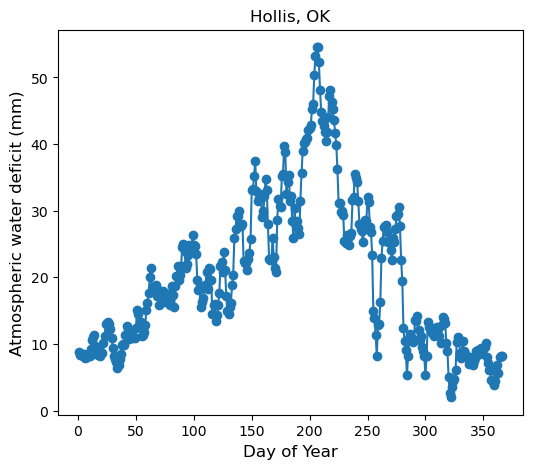

In [15]:
# Plot current variables
plt.figure(figsize=(6,5))
plt.title("Hollis, OK", size=12)
plt.plot(doy_awd, mean_awd, '-o')
plt.xlabel('Day of Year', size=12)
plt.ylabel('Atmospheric water deficit (mm)', size=12)
plt.show()


In [13]:
# Calculate probability of AWD > 50 mm
drought_threshold = 50
idx = df["awd"] > drought_threshold
awd_prob_50mm = idx.groupby(df["doy"]).sum() / grouped_awd.size()


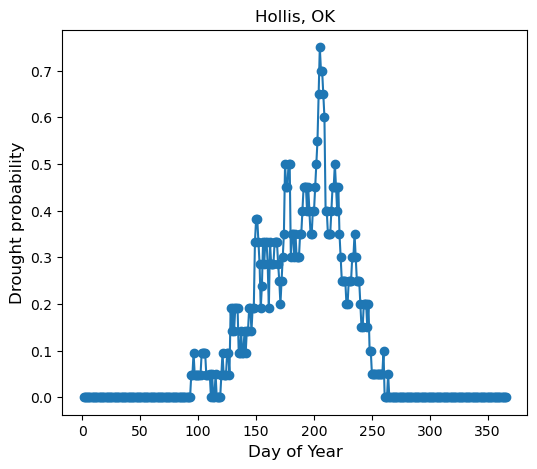

In [16]:
# Plot probability chart
plt.figure(figsize=(6,5))
plt.title("Hollis, OK", size=12)
plt.plot(doy_awd, awd_prob_50mm, '-o')
plt.xlabel('Day of Year', size=12)
plt.ylabel('Drought probability', size=12)
plt.show()


## References

Torres, G.M., Lollato, R.P. and Ochsner, T.E., 2013. Comparison of drought probability assessments based on atmospheric water deficit and soil water deficit. Agronomy Journal, 105(2), pp.428-436.